# Airbnb Notebook

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 28 06:28:50 2020

@author: ramon
"""
import pandas as pd
import numpy as np
np.random.seed(0)

import math

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from xgboost import plot_importance
 
from sklearn.ensemble import StackingRegressor

In [2]:
## load data
name = 'data.csv'
y_name = 'price'

data = pd.read_csv(name, sep=',', header=0)

data.head(n=5)

,bed_type,guests_included,room_type,bathrooms,price,neighbourhood,host_total_listings_count,require_guest_phone_verification,availability_30,review_scores_value,...,availability_60,host_is_superhost,number_of_reviews_ltm,review_scores_location,availability_365,minimum_nights,availability_90,host_listings_count,calculated_host_listings_count_private_rooms,num_amenities
0,Real Bed,2,Entire home/apt,1.0,332.0,Copacabana,2.0,0,23,9.0,...,31,1.0,27,10.0,303,4,35,2.0,0,33
1,Real Bed,2,Entire home/apt,1.0,160.0,Copacabana,3.0,1,16,9.0,...,22,0.0,17,10.0,119,7,35,3.0,0,14
2,Real Bed,2,Entire home/apt,1.0,273.0,Ipanema,1.0,0,2,10.0,...,5,1.0,42,10.0,88,2,9,1.0,0,25
3,Real Bed,2,Entire home/apt,1.5,378.0,Ipanema,1.0,1,5,9.0,...,6,1.0,35,10.0,85,2,17,1.0,0,33
4,Real Bed,2,Entire home/apt,1.0,130.0,Copacabana,1.0,1,4,10.0,...,6,1.0,40,10.0,128,3,12,1.0,0,41


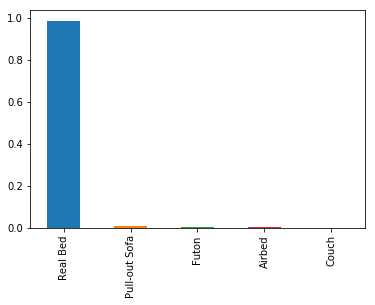

In [3]:
cnt_bed_type = data['bed_type'].value_counts()
(cnt_bed_type/np.sum(cnt_bed_type)).plot(kind='bar')

In [4]:
data.shape

(31757, 37)

In [6]:
data.dtypes

bed_type                                         object
guests_included                                   int64
room_type                                        object
bathrooms                                       float64
price                                           float64
neighbourhood                                    object
host_total_listings_count                       float64
require_guest_phone_verification                  int64
availability_30                                   int64
review_scores_value                             float64
calculated_host_listings_count                    int64
accommodates                                      int64
review_scores_accuracy                          float64
require_guest_profile_picture                     int64
maximum_nights                                    int64
review_scores_checkin                           float64
number_of_reviews                                 int64
review_scores_rating                            